In [1]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Read measures

In [2]:
measures={}
for name in ['HINT','IntAct','Reactome','STRING']:
    measures[name]=pd.read_csv('3 - output/resume_'+name+'.tsv',sep='\t',index_col=0)

### Read gene list

In [3]:
file = open('4 - output/targetGenes.pickle', 'rb')
targetGenes=pickle.load(file)
file.close()

### Functions

In [4]:
def heatmapPlot(geneList,saveName):
    columnSize=0.5 #in inches
    plt.figure(figsize=(columnSize*len(geneList),6),dpi=250)
    stdMeans={}
    dataFrames={}
    #for measure in ['Degree','PageRank','Eigenvector','AvgNeighbors','Clustering']:   ]
    for plotCont,measure in enumerate(['Degree','Eigenvector','AvgNeighbors','Clustering']): 
        plt.subplot(4,1,plotCont+1)
        resume={}
        for name in measures:
            resume[name]={}
            measureList = list(measures[name].sort_values(by=measure,ascending=False)['nodeName'])
            for gene in geneList:
                try:
                    resume[name][gene]=round(1-(measureList.index(gene)/len(measureList)),4)
                except ValueError:
                    resume[name][gene]=np.nan

        resume = dict(pd.DataFrame(resume).T)     
        resume2={}
        for name, std in dict(pd.DataFrame(resume).std()).items():
            #Code to show the STD in x-Axis
#             if std != np.nan:
#                 resume2[name+' ('+str(round(std,2))+')']=resume[name]
#             else:
#                 resume2[name]=resume[name]
            resume2[name]=resume[name]


        stdMeans[measure.upper()]=round(pd.DataFrame(resume).std().mean(),2)
        dataFrames[measure.upper()]=pd.DataFrame(resume)

        cmap = sns.color_palette("autumn_r", as_cmap=True)
        sns.heatmap(pd.DataFrame(resume2),annot=True, fmt=".2f", 
                   linewidths=0.5, linecolor='#ccc',cmap=cmap, vmin=0, vmax=1, 
                   cbar=False, square=False,annot_kws={"size": 8})
        plt.xticks(rotation=-90)

        if(measure!='Clustering'):
            #get current axes
            ax = plt.gca()
            #hide x-axis
            ax.get_xaxis().set_visible(False)

        plt.tight_layout()
        if(measure=='AvgNeighbors'):
            measure='Average Neighbors Degree'
        plt.title(measure.upper(),y=0.97,fontsize=10)
    plt.tight_layout(pad=0.3)
    plt.savefig("5 - output/top "+saveName+".png", format='png', dpi=550,facecolor="white")
    plt.show()

    return stdMeans,dataFrames

# TOP 1-15 Drivers

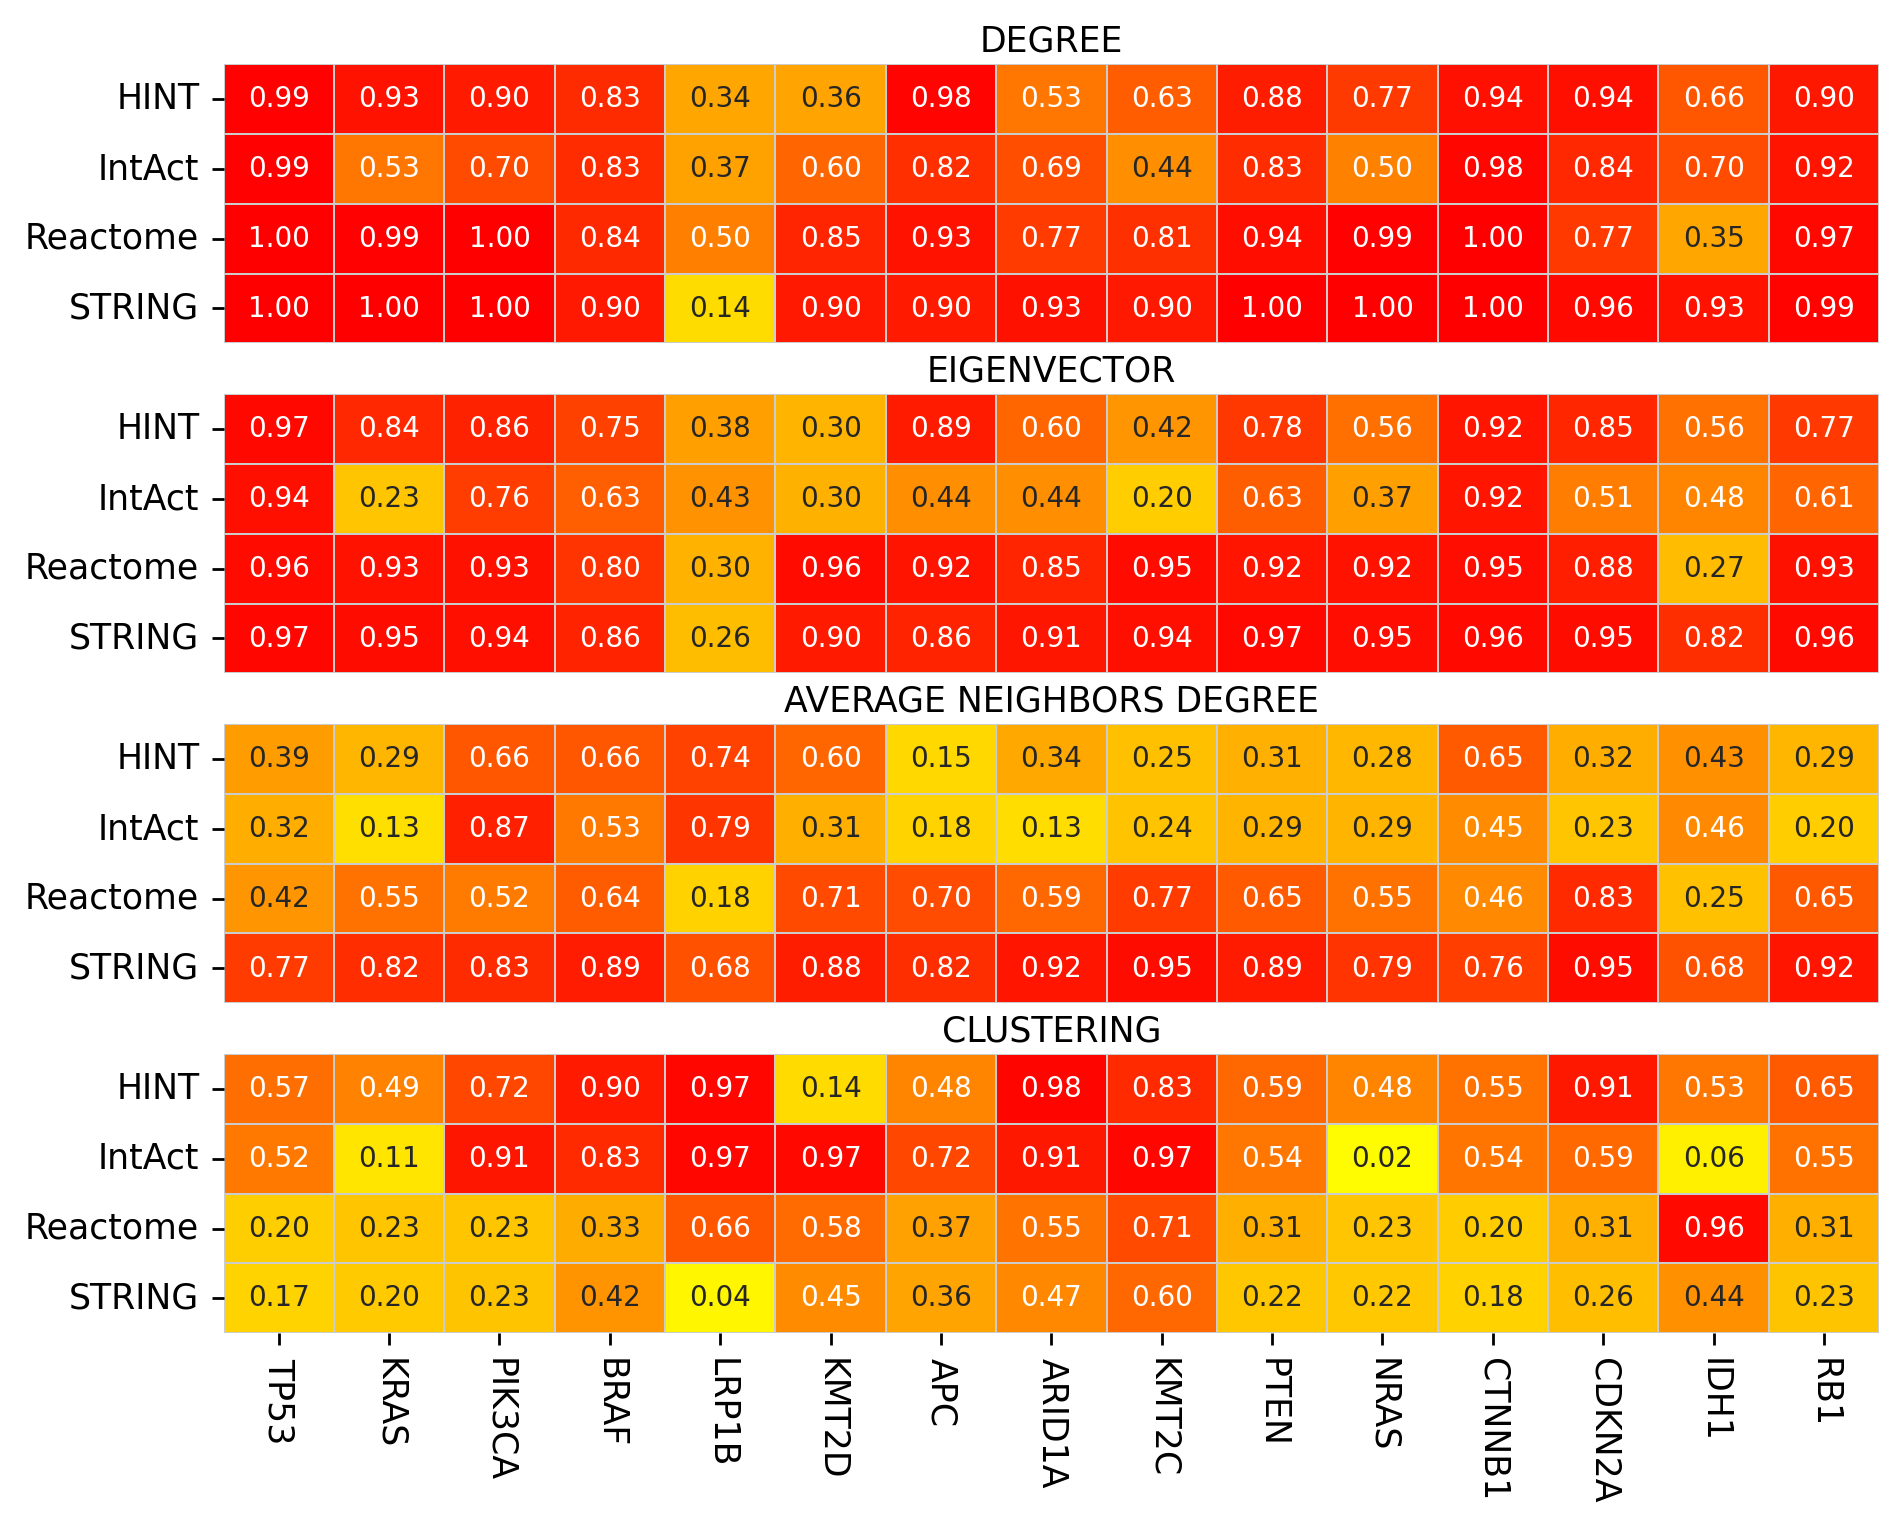

,Avg Std
DEGREE,0.13
EIGENVECTOR,0.19
AVGNEIGHBORS,0.26
CLUSTERING,0.25


In [5]:
dfDrivers,dfs=heatmapPlot(targetGenes['Top Drivers'],'Top 1-15 Drivers')
pd.DataFrame(dfDrivers,index=['Avg Std']).T

# Alzheimer Genes

In [6]:
len(targetGenes['Alzheimer'])

21

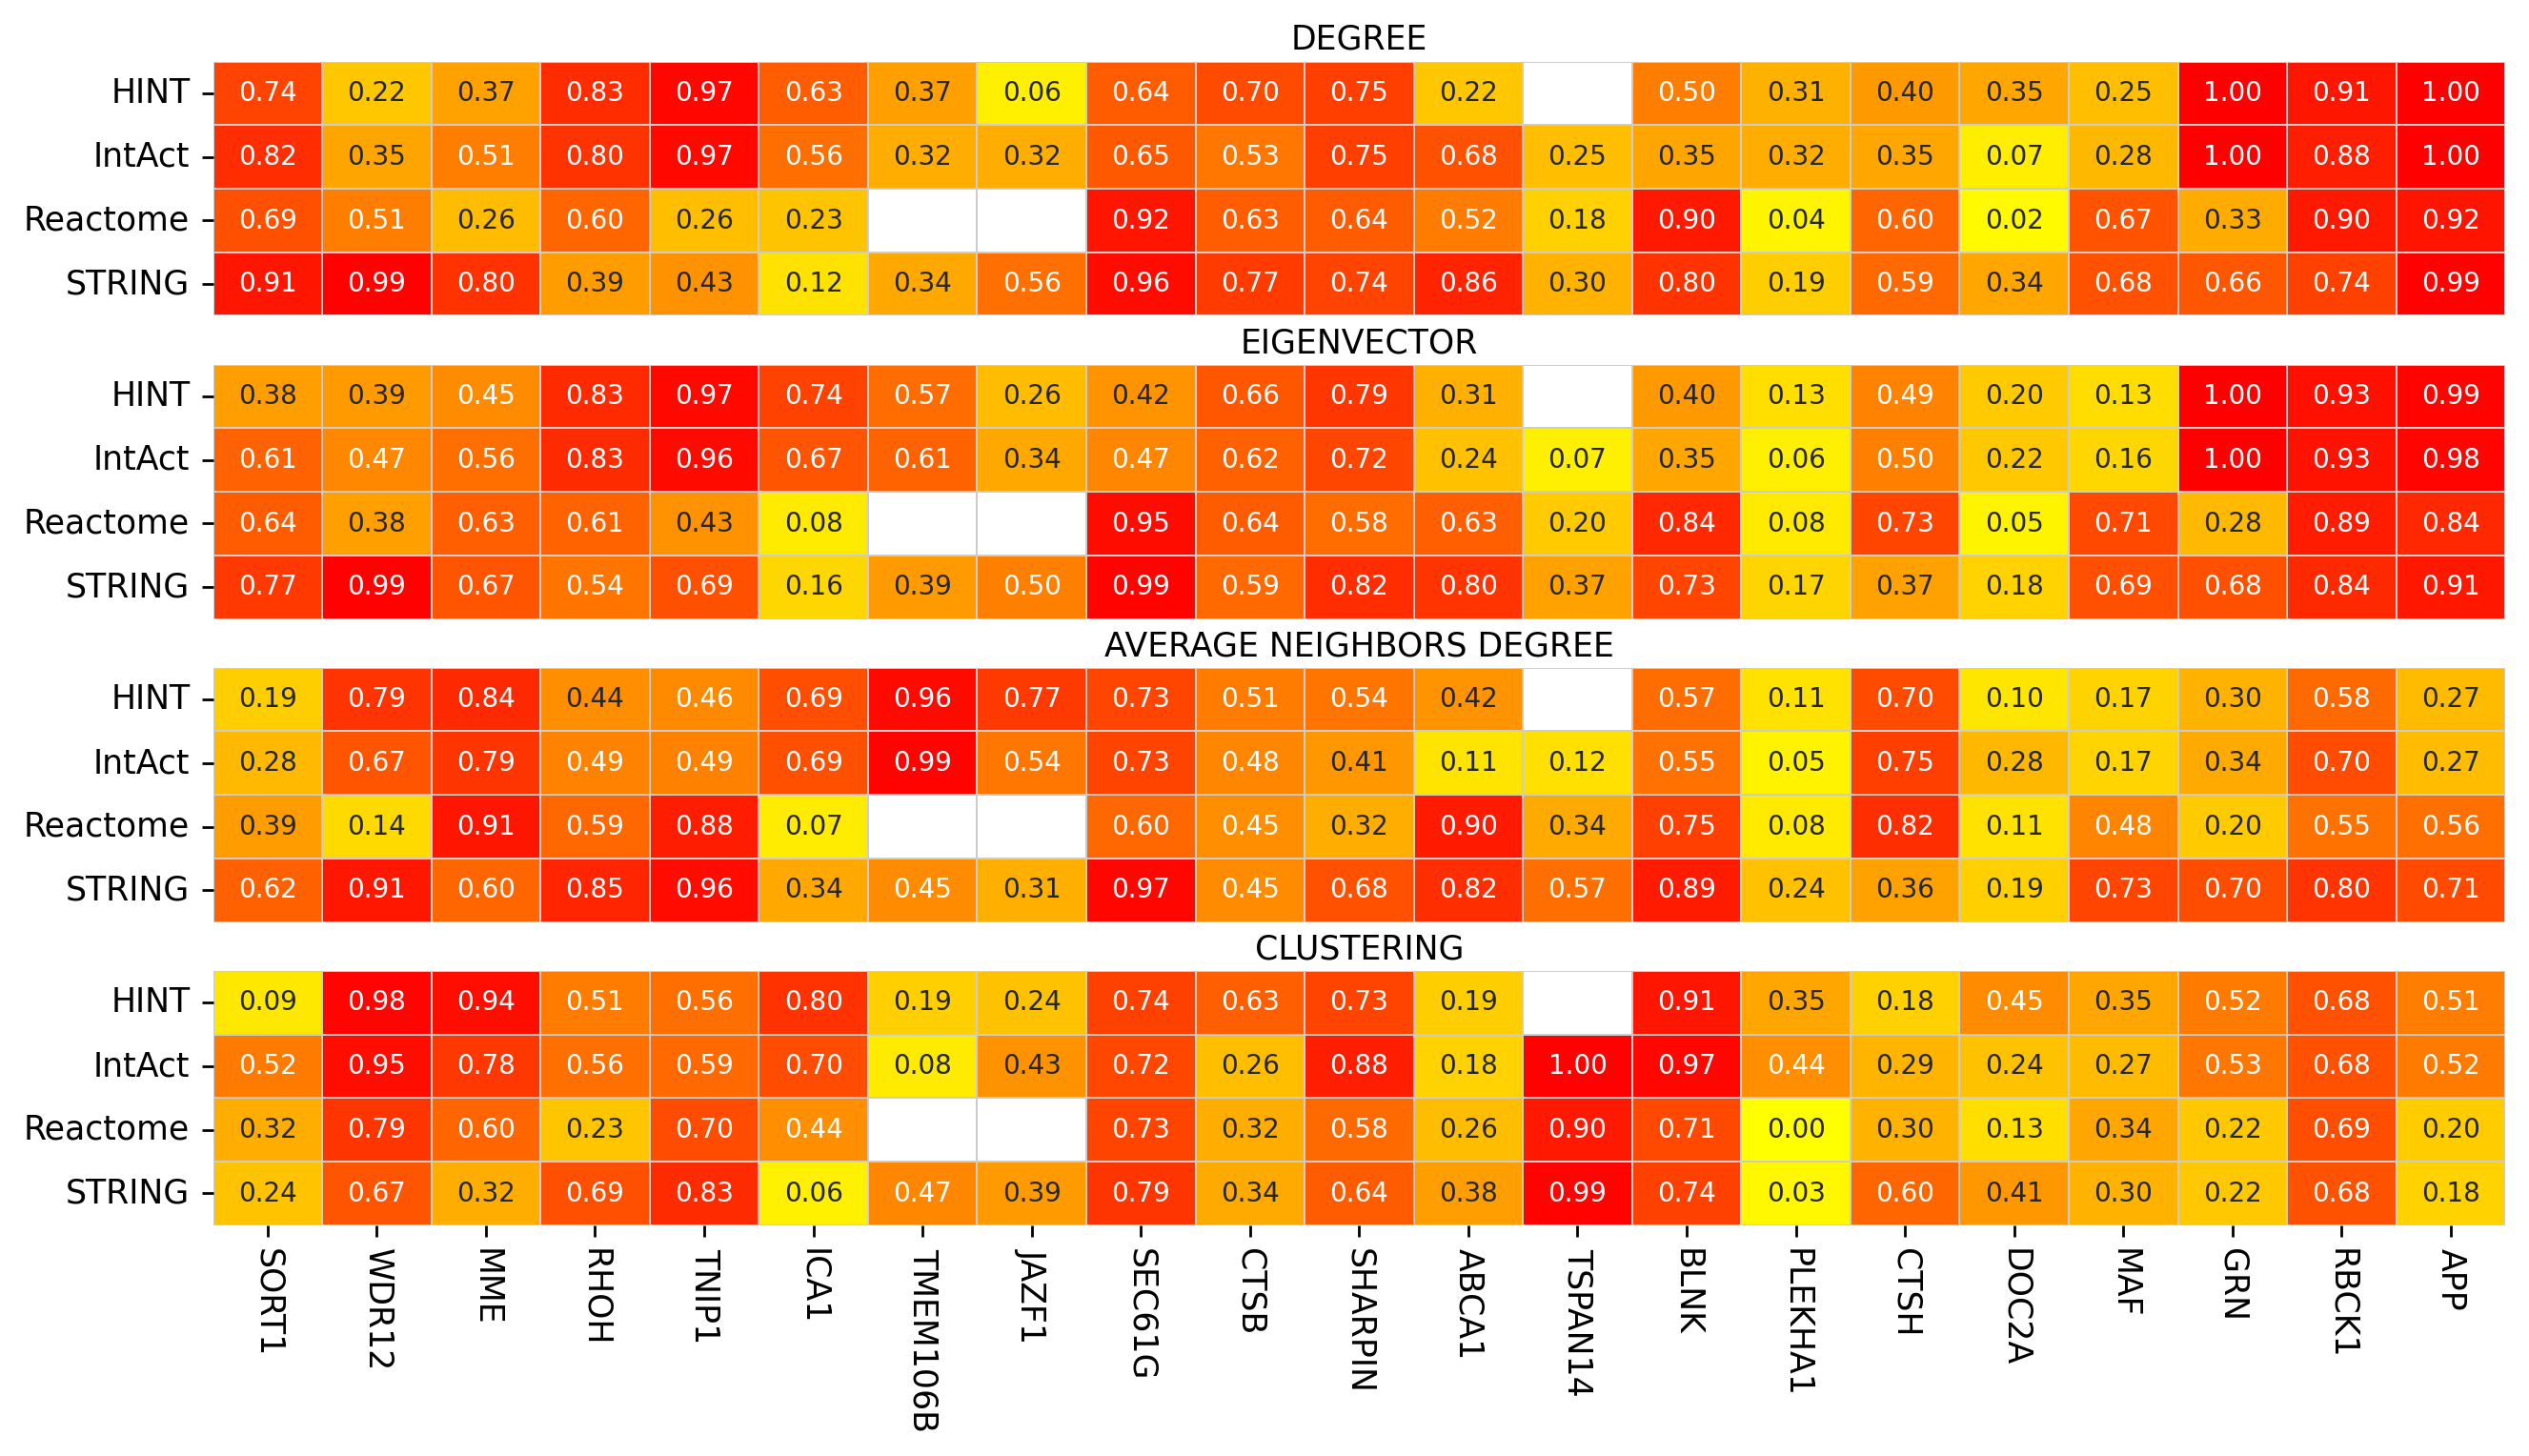

,Avg Std
DEGREE,0.18
EIGENVECTOR,0.18
AVGNEIGHBORS,0.20
CLUSTERING,0.15


In [7]:
dfAlzheimer,dfs=heatmapPlot(targetGenes['Alzheimer'],'Alzheimer')
pd.DataFrame(dfAlzheimer,index=['Avg Std']).T

# Popular

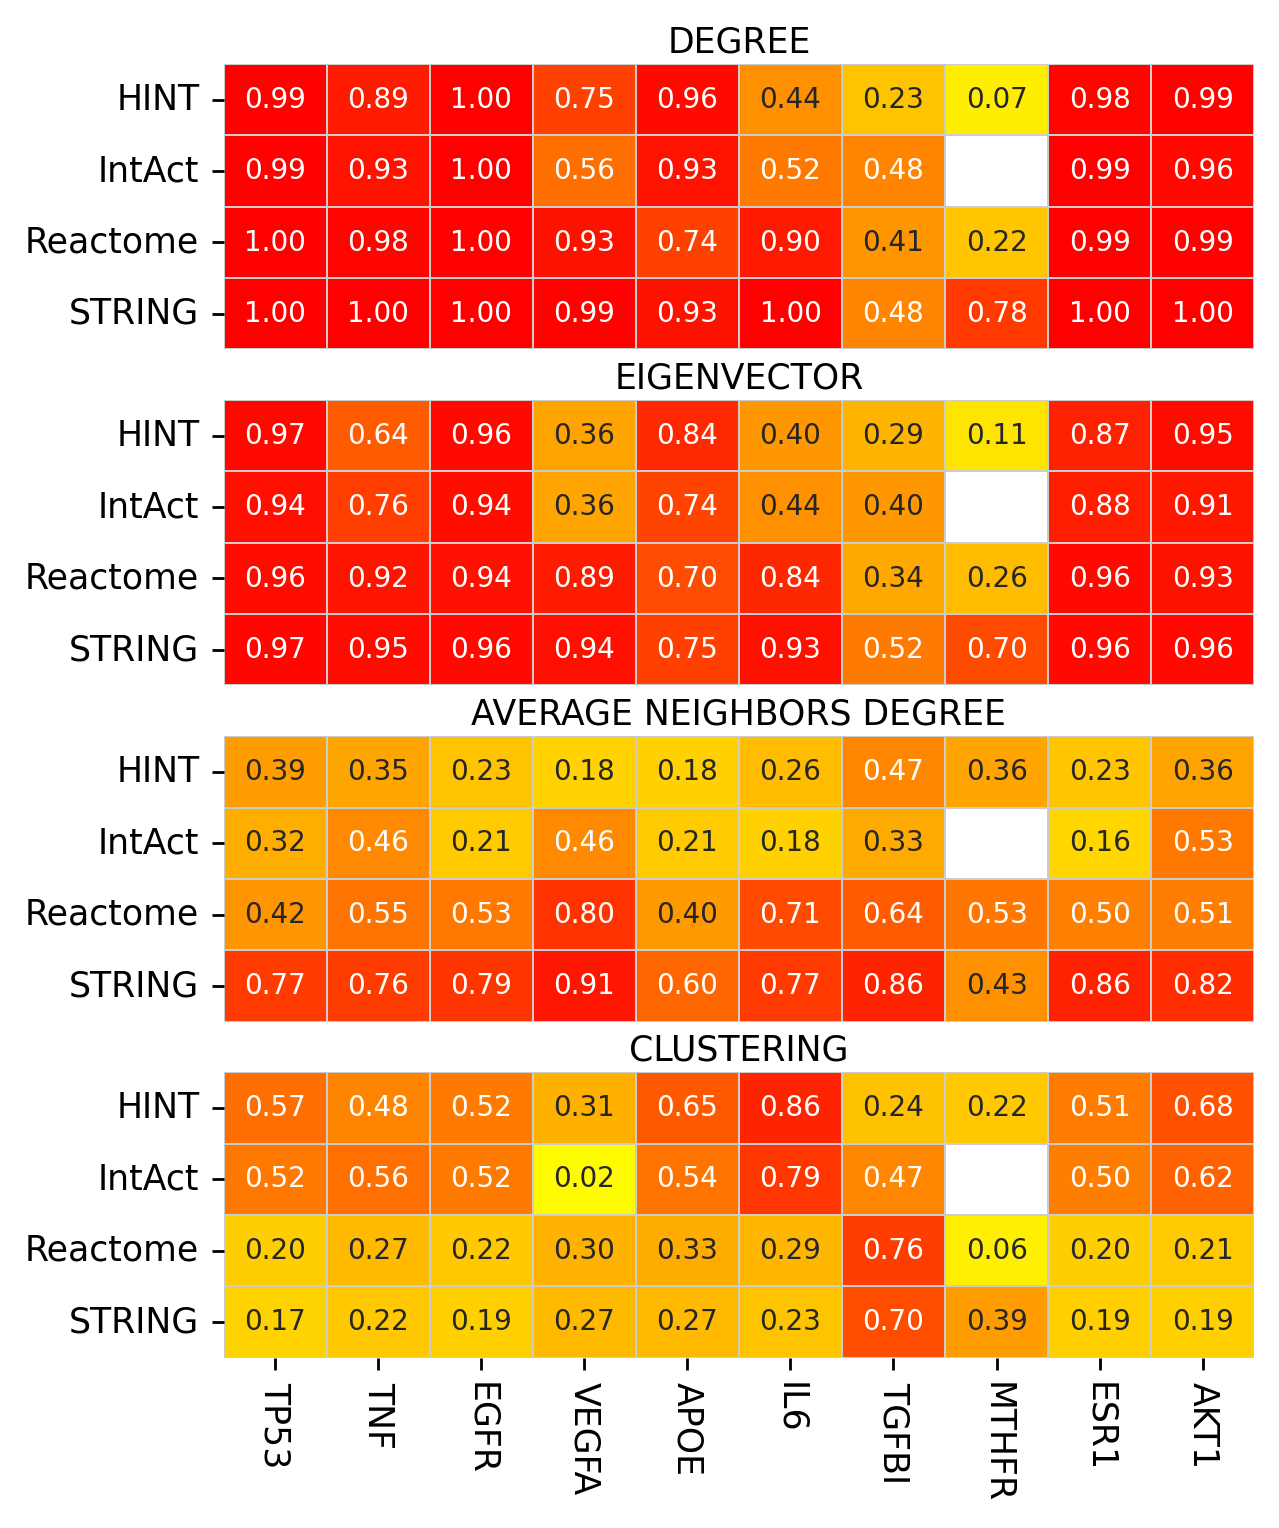

,Avg Std
DEGREE,0.11
EIGENVECTOR,0.13
AVGNEIGHBORS,0.23
CLUSTERING,0.20


In [8]:
dfPopularGenes,dfs=heatmapPlot(targetGenes['Popular'],'Popular')
pd.DataFrame(dfPopularGenes,index=['Avg Std']).T

# Diabetes

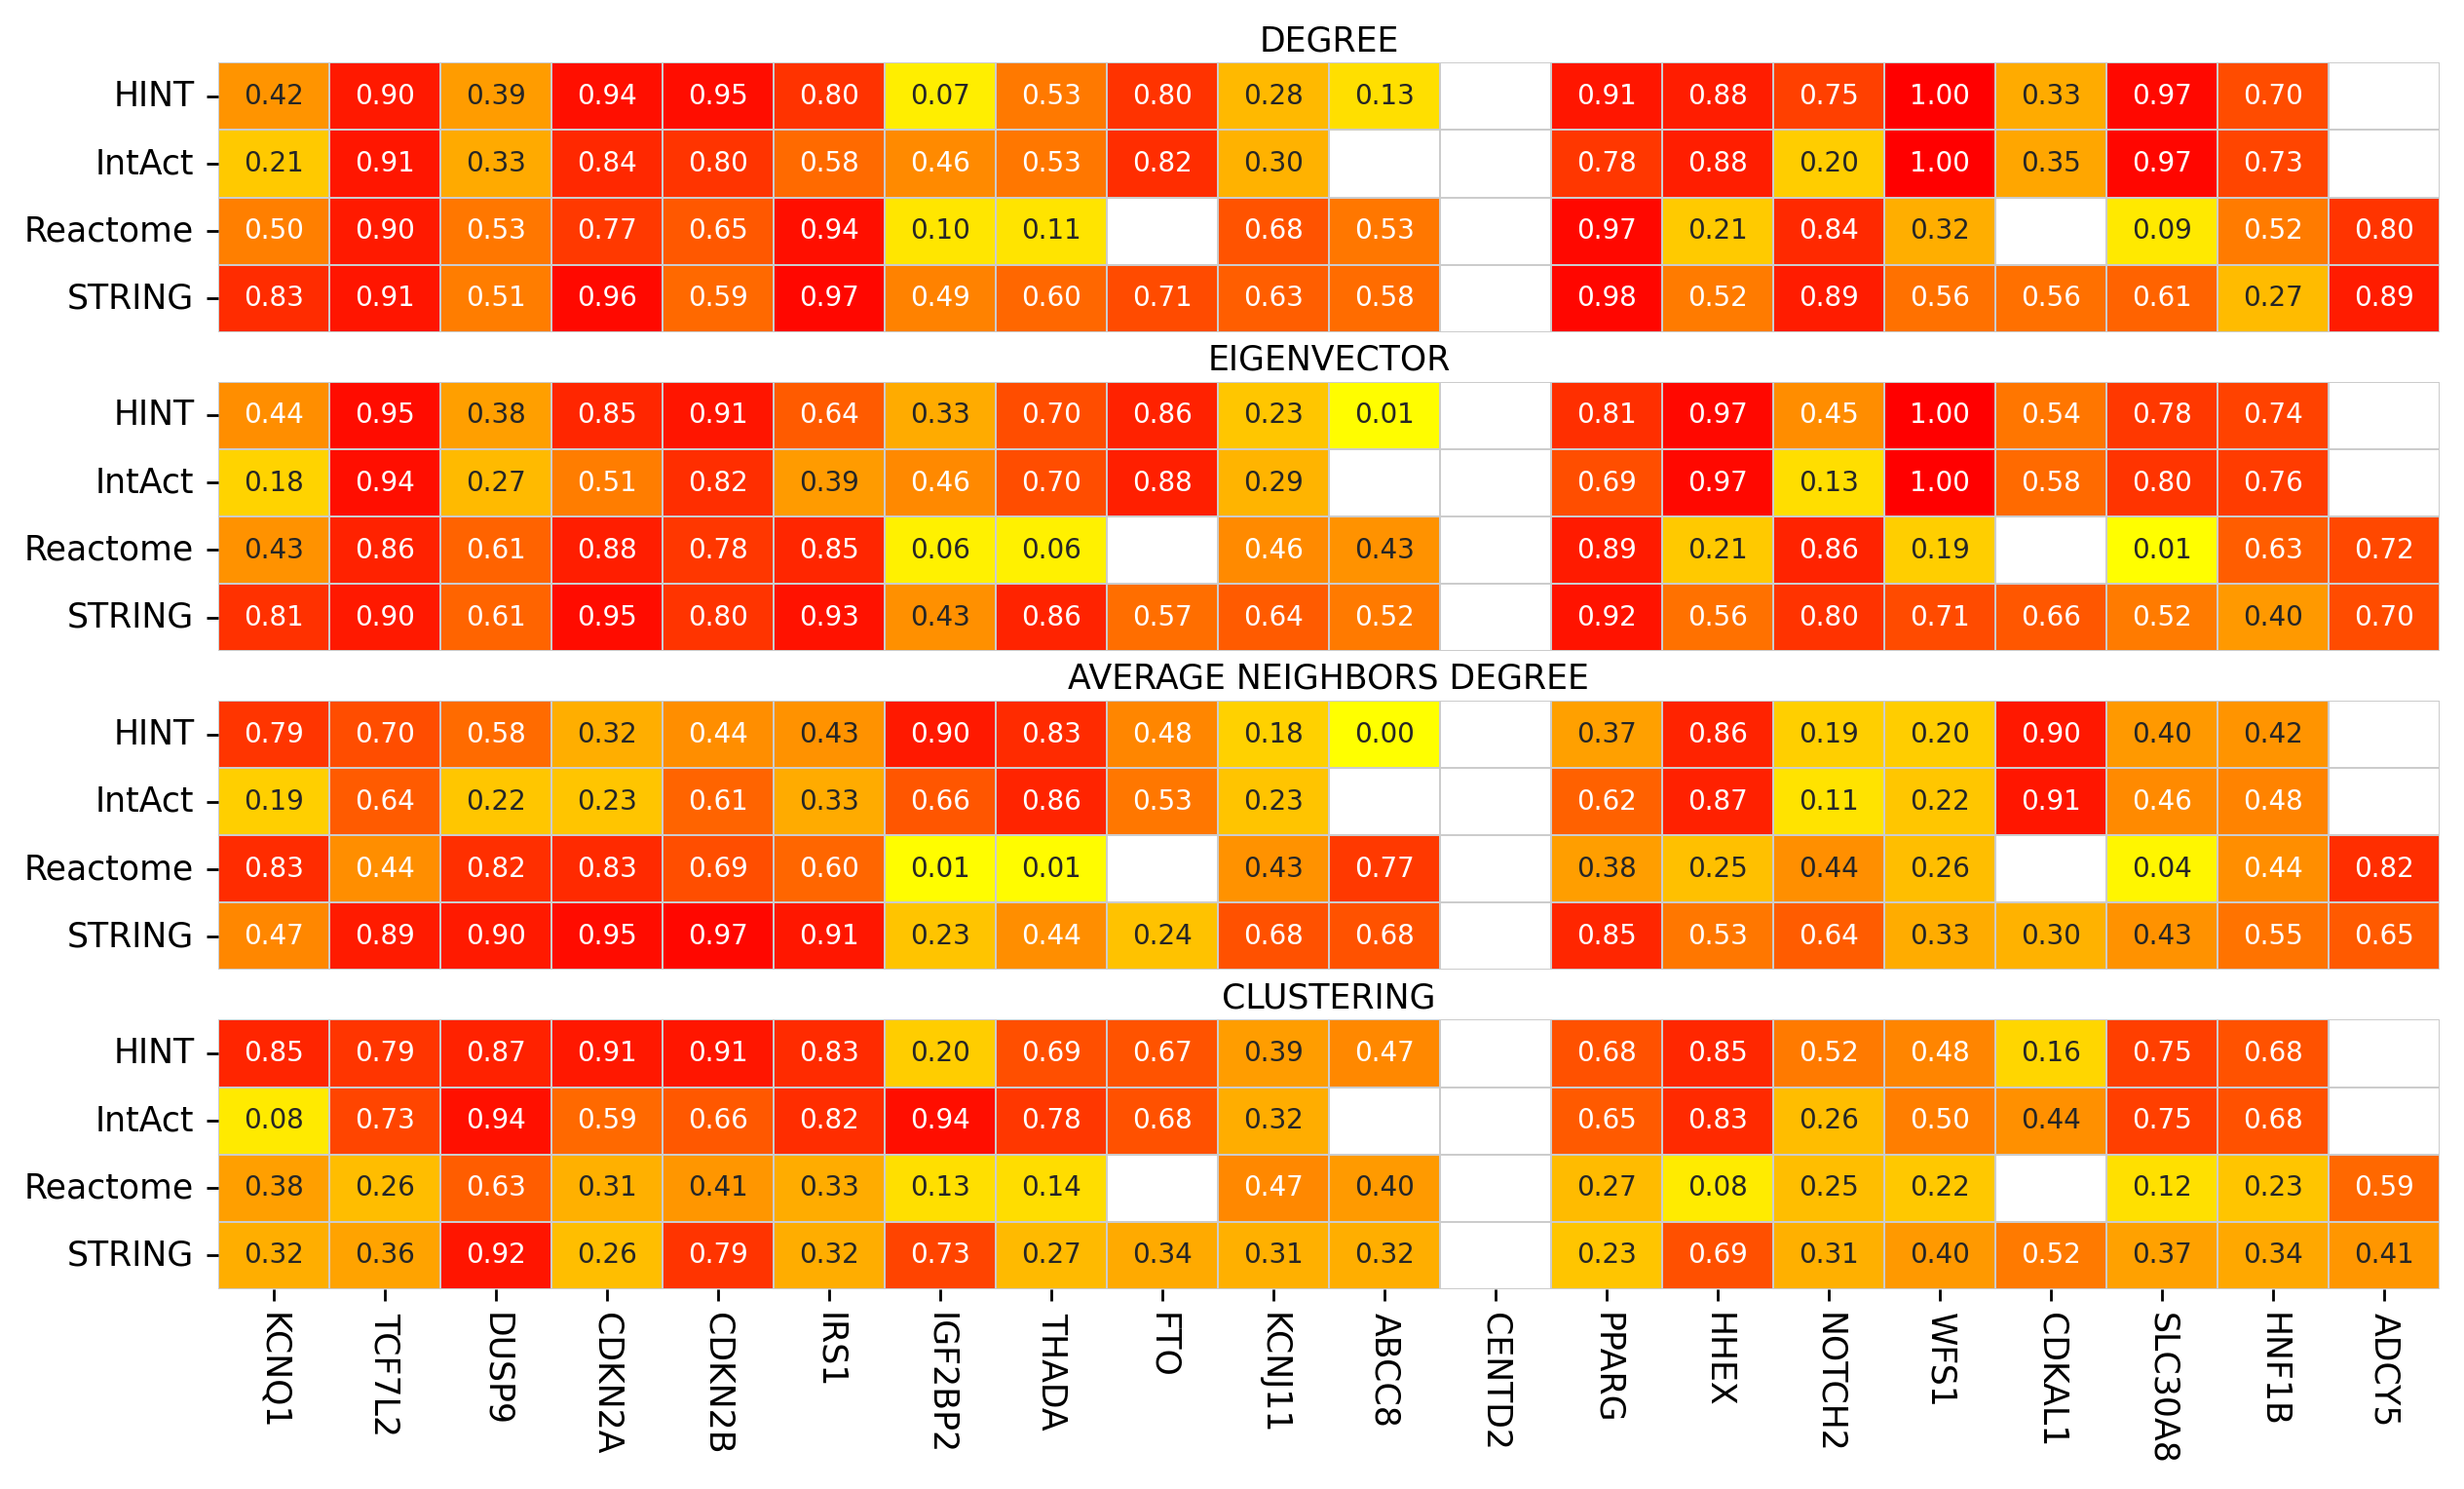

,Avg Std
DEGREE,0.19
EIGENVECTOR,0.21
AVGNEIGHBORS,0.25
CLUSTERING,0.23


In [9]:
dfDiabetes,dfs=heatmapPlot(targetGenes['Diabetes'],'Diabetes')
pd.DataFrame(dfDiabetes,index=['Avg Std']).T

### Resume

In [10]:
resume={
    'Drivers':dfDrivers,
    'Popular':dfPopularGenes,
    'Alzheimer':dfAlzheimer,
    'Diabetes':dfDiabetes
}
pd.DataFrame(resume)

,Drivers,Popular,Alzheimer,Diabetes
DEGREE,0.13,0.11,0.18,0.19
EIGENVECTOR,0.19,0.13,0.18,0.21
AVGNEIGHBORS,0.26,0.23,0.20,0.25
CLUSTERING,0.25,0.20,0.15,0.23
